In [0]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [0]:
# Load the dataset
ds=pd.read_csv('Training_data.csv')

In [0]:
ds.head(40)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [0]:
#info
ds.shape
data_set=ds.drop_duplicates()

In [0]:
# Remove the unneeded columns
data_set=data_set.drop(labels='id',axis=1)
columns_op=data_set.drop(labels='diagnosis',axis=1)

In [0]:
x=[]
for data in range(0,532):
    l= [i for i in columns_op.loc[data]]
    x.append(l)
x=np.array(x)

In [0]:
# Divide the data in training and validation
training_data=data_set[:320]
validation_data=data_set[320:]

In [0]:
# Divide each training and validation into X and y
training_y = training_data['diagnosis']
training_x=x[:320]
validation_y = validation_data['diagnosis']
validation_x=x[320:]

In [0]:
print(training_x[0])
print(training_y[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
M


In [0]:
training_y=np.array(training_y)
validation_y=np.array(validation_y)

In [0]:
# Make sure that for the labels, the classes are either 0 or 1 (replace M and B by 0 and 1)
for index in range(0,len(training_y)):
    if training_y[index]=='M':
        training_y[index]=0
    else:
        training_y[index]=1
for index in range(0,len(validation_y)):
    if validation_y[index]=='M':
        validation_y[index]=0
    else:
        validation_y[index]=1

In [0]:
validation_y

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=object)

In [0]:
# Complete the implementation of the KNN algorithm
class KNN():
    def __init__(self,K,training_data,training_labels,type_of_distance_measure):
        self.K = K
        self.data_X = training_data
        self.data_y = training_labels
        self.type_of_distance_measure=type_of_distance_measure

        
    def predict(self,x_input):
        
        # Calculate the distance between the given input point and all points in the training dataset
        # store for each point in the training dataset the distance in the array distances
        distances = []
        for data in self.data_X:
            if self.type_of_distance_measure=='MSE':
                distances.append(self.compareMSE(data,x_input))
            elif self.type_of_distance_measure=='L2':
                distances.append(self.compareEuclidean(data,x_input))
            elif self.type_of_distance_measure=='RMSE':
                distances.append(self.compareRMSE(data,x_input))
            elif self.type_of_distance_measure=='L1':
                distances.append(self.compareManhattan(data,x_input))
            else:
                print("Error, {} is not defined as a distance measure!".format(self.type_of_distance_measure))
            
        # Get the first K indices of the sorted distances array
        nearest_K_indices = np.argsort(distances)[:self.K]
        
        # Find the labels of those nearest K points and add them to the array neighbor labels
        neighbor_labels = self.data_y[nearest_K_indices]
        
        # See which labels is most presented in our K points
        unique,counts=np.unique(neighbor_labels,return_counts=True)
        top_label = unique[np.argmax(counts)]
        return top_label
    
    
    # Implement the following distance measures
        
    def compareMSE(self,x1,x2):
        pass
    
    def compareEuclidean(self,x1,x2):
        diff=x2/255-x1/255
        diff_sq=diff*diff
        return np.sqrt(diff_sq.sum())
    
    def compareRMSE(self,x1,x2):
        pass
    def compareManhattan(self,x1,x2):
        diff=np.abs(x2/255-x1/255)
        return diff.sum()

### The function to calculate the accuracy, precision, recall, and f1 has been provided. You don't need to rewrite it.

In [0]:
from sklearn.metrics import accuracy_score


'''
This function is used to test our model
Inputs:
model: our model which needs to have a method "predict" that takes input and returns label
test_X: testing images
test_y: testing labels
verbose: If true, detailed accuracy, precision, recall, and f1 scores will be printed, otherwise nothing will be printed

Returns:
accuracy: accuracy of the model over all classes
precision: precision of the model over all classes
recall: recall of the model over all classes
f1: f1 score of the model over all classes
'''


def test_model(model,test_X,test_y,verbose=True):
    num_of_classes = len(np.unique(test_y))
    preds = []
    class_names = [0,1]
    for x,y in tqdm(zip(test_X,test_y)):
        prediction = model.predict(x)
        preds.append(prediction)
    accuracy=accuracy_score(np.array(test_y,dtype=np.int8),np.array(preds,dtype=np.int8))
    return accuracy

### Calculate the accuracy for multiple K values and multiple distance measures using the validation dataset

In [0]:
KNN_classifier=KNN(1,training_x,training_y,'L2')
accuracy_k1=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

KNN_classifier=KNN(3,training_x,training_y,'L2')
accuracy_k3=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

KNN_classifier=KNN(5,training_x,training_y,'L2')
accuracy_k5=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

KNN_classifier=KNN(7,training_x,training_y,'L2')
accuracy_k7=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

KNN_classifier=KNN(10,training_x,training_y,'L2')
accuracy_k10=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

KNN_classifier=KNN(12,training_x,training_y,'L2')
accuracy_k12=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

KNN_classifier=KNN(16,training_x,training_y,'L2')
accuracy_k16=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

KNN_classifier=KNN(20,training_x,training_y,'L2')
accuracy_k20=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

212it [00:07, 27.79it/s]
212it [00:08, 26.44it/s]
212it [00:06, 32.20it/s]
212it [00:06, 34.07it/s]
212it [00:06, 36.32it/s]
212it [00:06, 33.92it/s]
212it [00:07, 29.70it/s]
212it [00:06, 31.68it/s]


### Graph the accuracy as a function of K for each distance measure

In [0]:
import matplotlib.pyplot as plt
K_values=[1,3,5,7,10,12,16,20]
accuracy_vals_L2=[accuracy_k1*100,accuracy_k3*100,accuracy_k5*100,accuracy_k7*100,accuracy_k10*100,accuracy_k12*100,accuracy_k16*100,accuracy_k20*100]
plt.plot(K_values,accuracy_vals_L2)
plt.xlabel('K values')
plt.ylabel('Accuracy %')
plt.title('Accuracy VS K values \n Using Euclidean distance (L2)')
plt.show()

Text(0.5,1,'Accuracy VS K values \n Using Euclidean distance (L2)')

In [0]:
KNN_classifier=KNN(1,training_x,training_y,'L1')
accuracy_k1=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

KNN_classifier=KNN(3,training_x,training_y,'L1')
accuracy_k3=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

KNN_classifier=KNN(5,training_x,training_y,'L1')
accuracy_k5=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

KNN_classifier=KNN(7,training_x,training_y,'L1')
accuracy_k7=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

KNN_classifier=KNN(10,training_x,training_y,'L1')
accuracy_k10=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

KNN_classifier=KNN(12,training_x,training_y,'L1')
accuracy_k12=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

KNN_classifier=KNN(16,training_x,training_y,'L1')
accuracy_k16=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

KNN_classifier=KNN(20,training_x,training_y,'L1')
accuracy_k20=test_model(KNN_classifier,validation_x,validation_y,verbose=True)

212it [00:05, 33.43it/s]
212it [00:05, 36.82it/s]
212it [00:05, 38.70it/s]
212it [00:06, 32.61it/s]
212it [00:05, 34.99it/s]
212it [00:05, 40.14it/s]
212it [00:05, 37.31it/s]
212it [00:05, 37.98it/s]


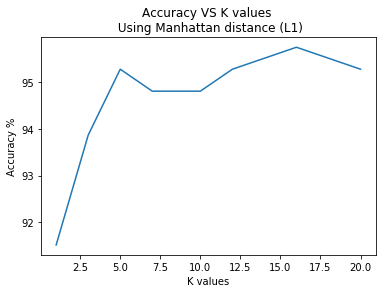

In [0]:
K_values=[1,3,5,7,10,12,16,20]
accuracy_vals_L1=[accuracy_k1*100,accuracy_k3*100,accuracy_k5*100,accuracy_k7*100,accuracy_k10*100,accuracy_k12*100,accuracy_k16*100,accuracy_k20*100]
plt.plot(K_values,accuracy_vals_L1)
plt.xlabel('K values')
plt.ylabel('Accuracy %')
plt.title('Accuracy VS K values \n Using Manhattan distance (L1)')
plt.show()

### Test your final model using the best value of K and best distance measure

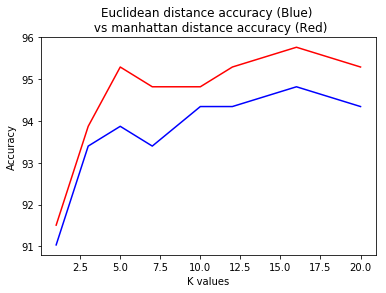

In [0]:
plt.plot(K_values,accuracy_vals_L1,color='red')
plt.plot(K_values,accuracy_vals_L2,color='blue')
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title('Euclidean distance accuracy (Blue) \n vs manhattan distance accuracy (Red)')
plt.show()